In [27]:
import pandas as pd
import numpy as np
import seaborn as sns

winedata = pd.read_csv('Data Sets/Red Wine Quality/winequality-red.csv')
winedata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
winedata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [29]:
winedata.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [30]:
pd.set_option('display.max_rows',None)           #displaying max rows

In [ ]:
pd.reset_option('all')                           #resetting display max rows option

Mean = 5.6360225140712945


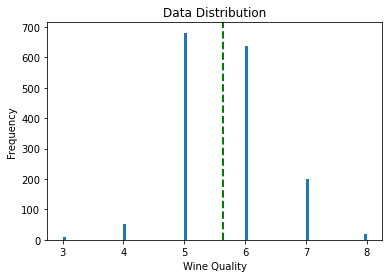

In [31]:
import matplotlib.pyplot as plt

plt.hist(bins = 100, x = winedata.quality)

plt.axvline(x=winedata['quality'].mean(), color = 'green', linestyle='dashed', linewidth = 2)

plt.title('Data Distribution')
plt.xlabel('Wine Quality')
plt.ylabel('Frequency')

print("Mean =",winedata['quality'].mean())
plt.show()

#fig, ax = plt.subplots()
#ax.bar(x,)

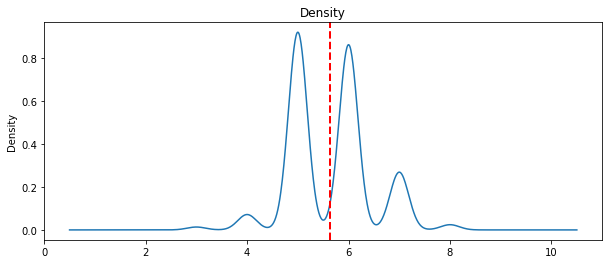

In [32]:
fig = plt.figure(figsize=(10,4))

winedata['quality'].plot.density()
plt.title('Density')
plt.axvline(x=winedata['quality'].mean(), color = 'red', linestyle='dashed', linewidth = 2)

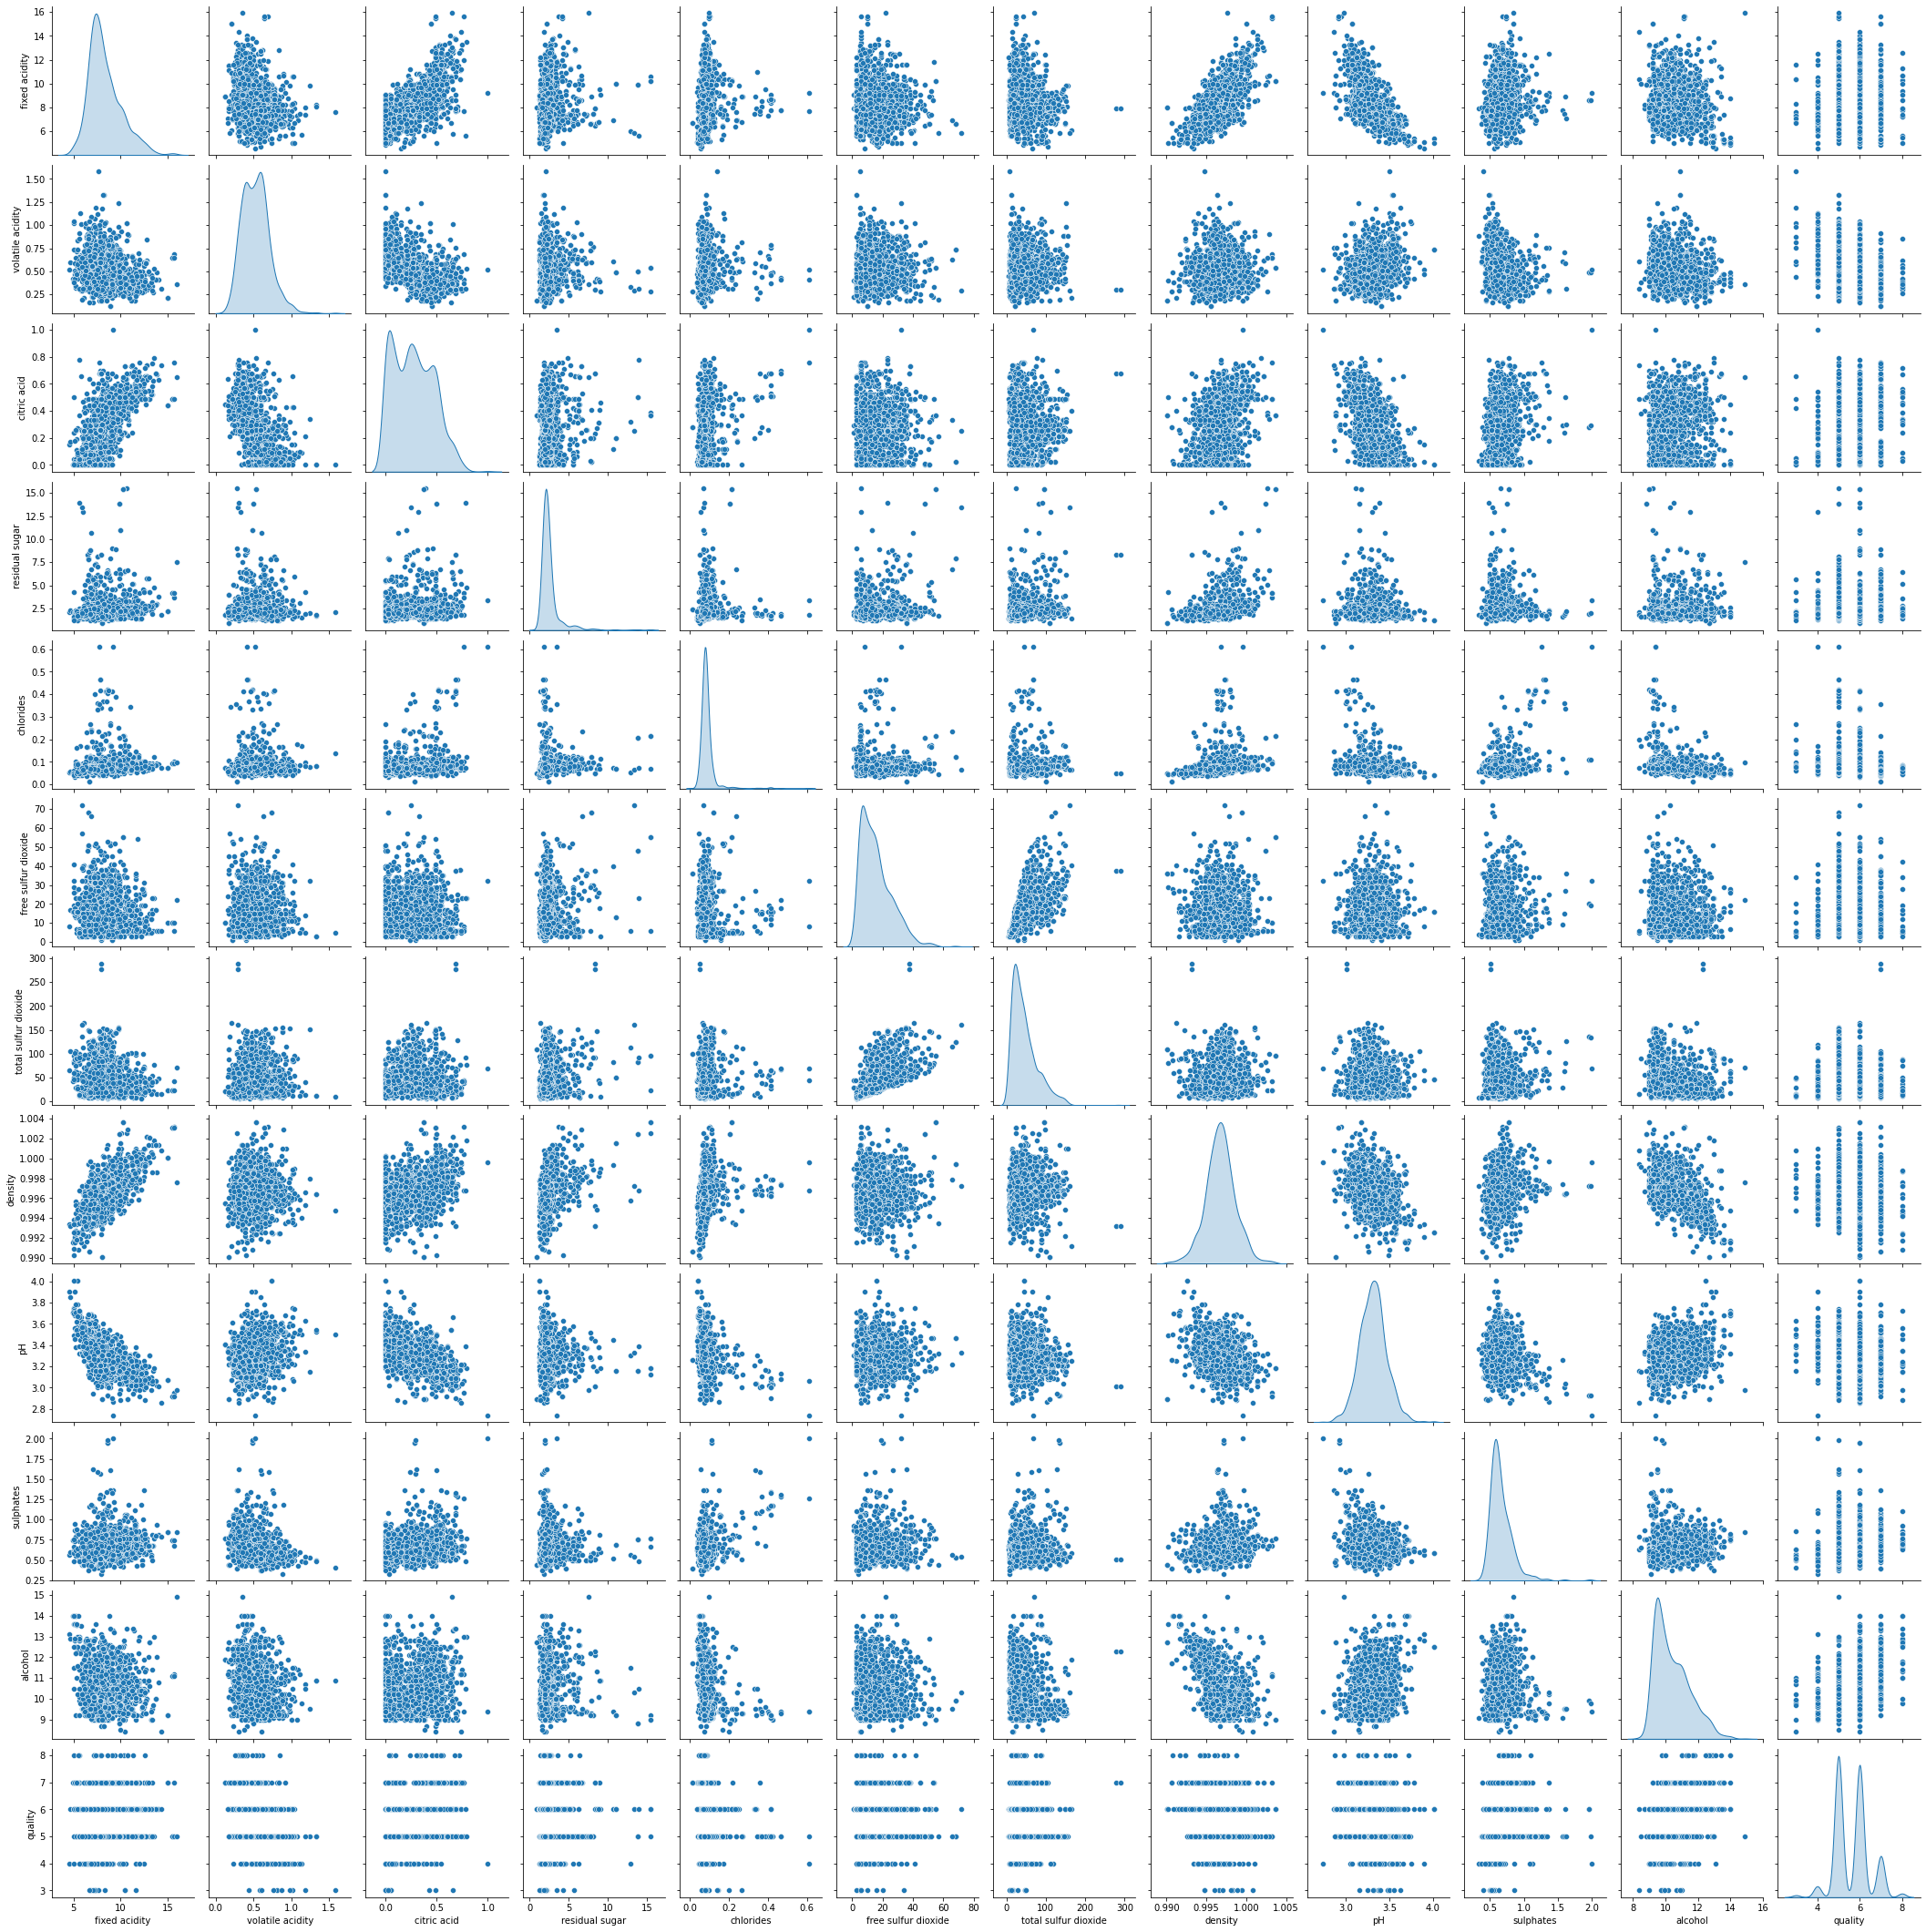

In [33]:
sns.pairplot(data=winedata, diag_kind='kde')


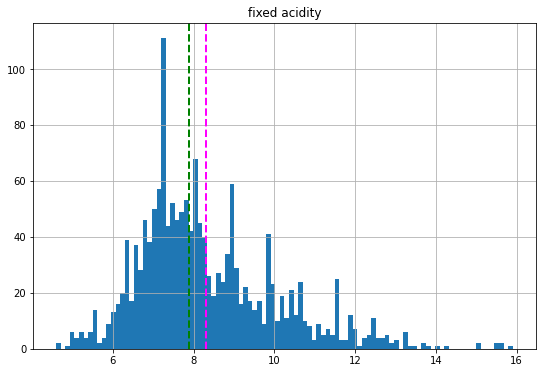

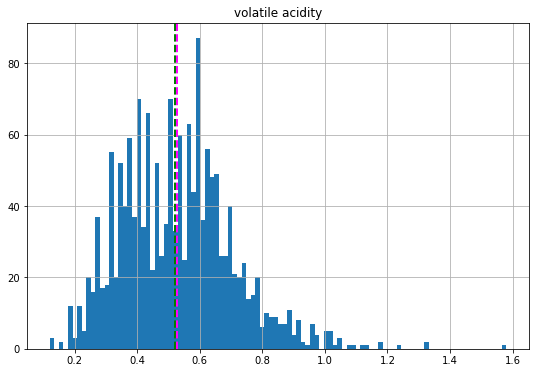

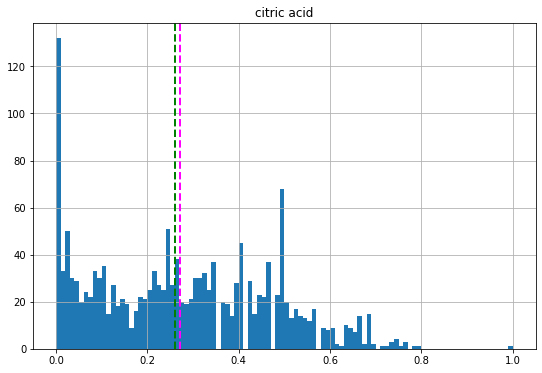

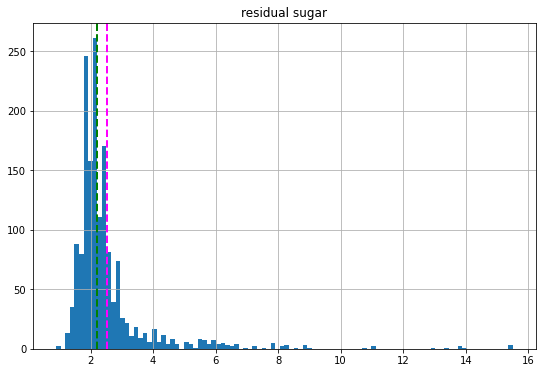

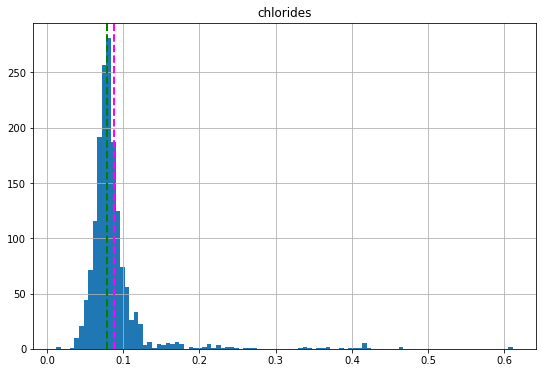

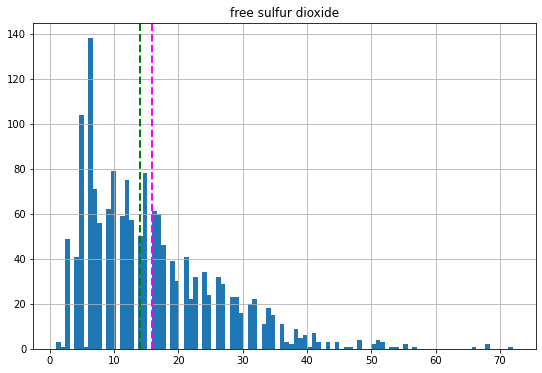

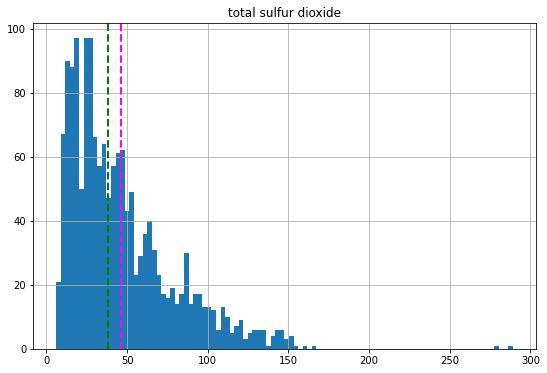

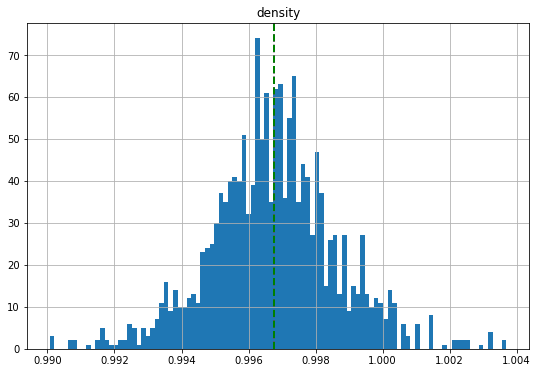

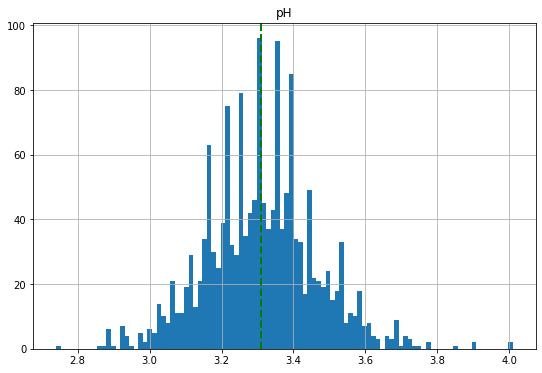

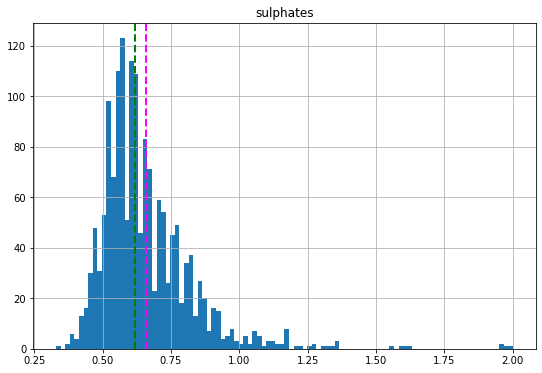

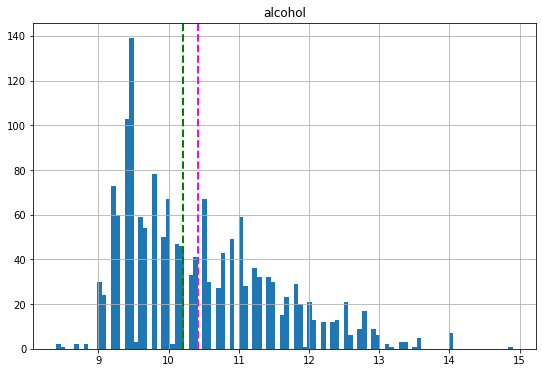

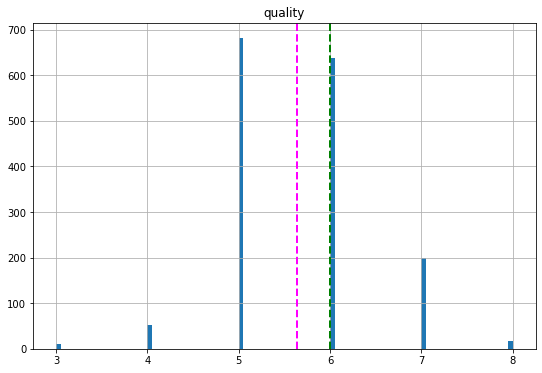

In [10]:
#plotting histograms for all the features

for col in winedata:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = winedata[col]
    feature.hist(bins=100, ax=ax)
    ax.axvline(feature.mean(), color = 'magenta', linestyle='dashed', linewidth = 2)
    ax.axvline(feature.median(), color = 'green', linestyle='dashed', linewidth = 2)
    ax.set_title(col)
plt.show()

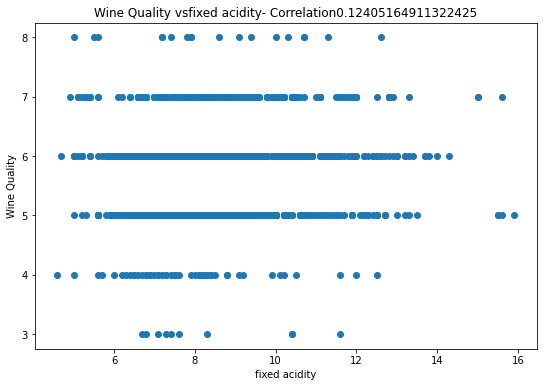

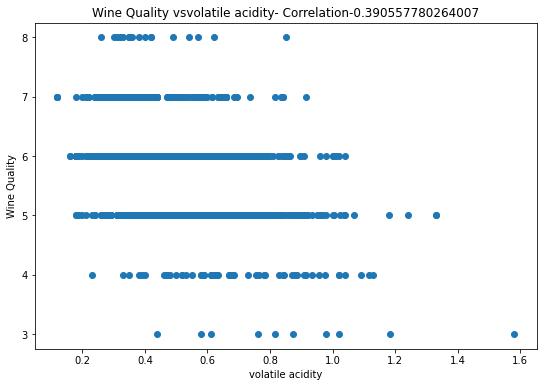

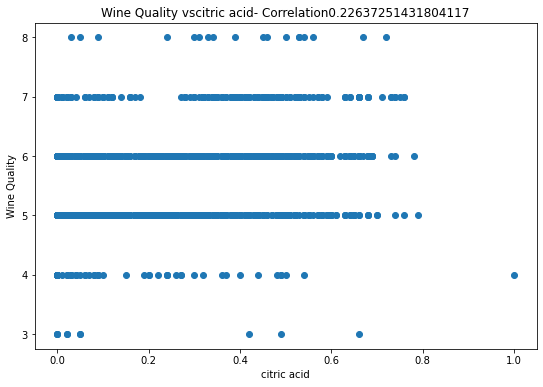

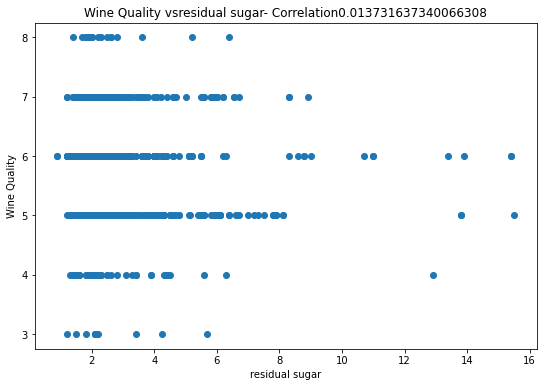

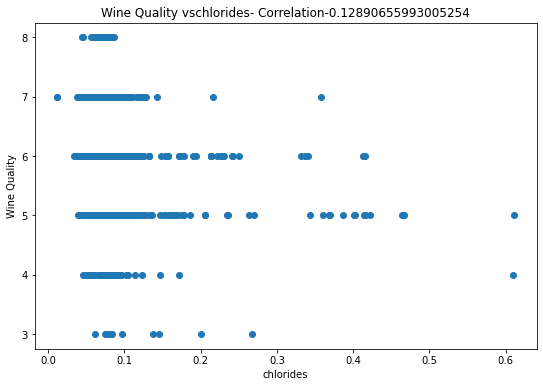

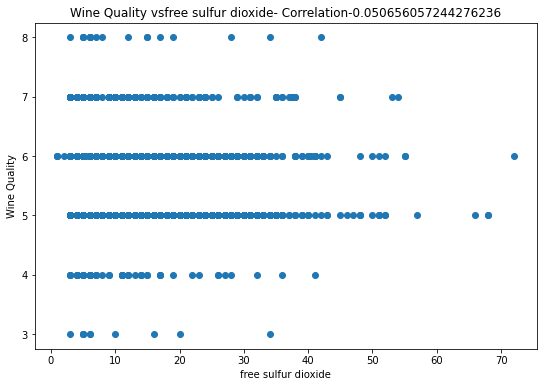

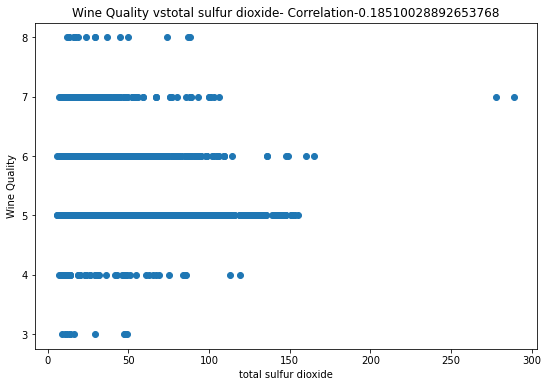

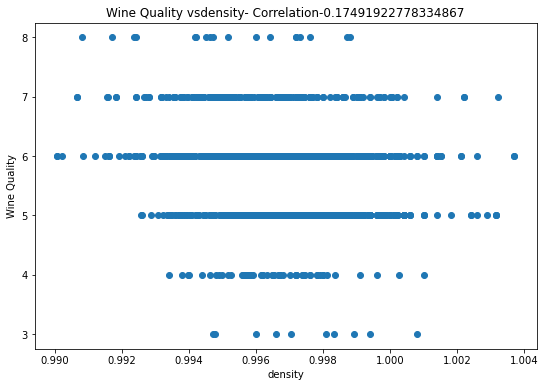

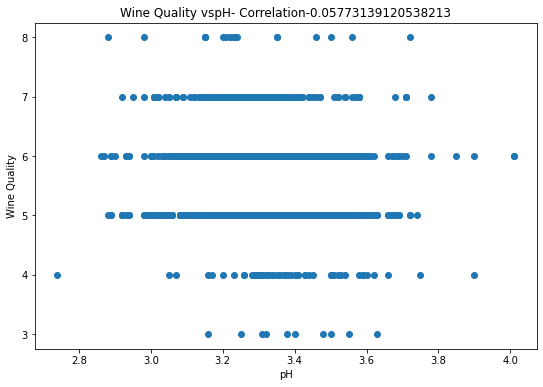

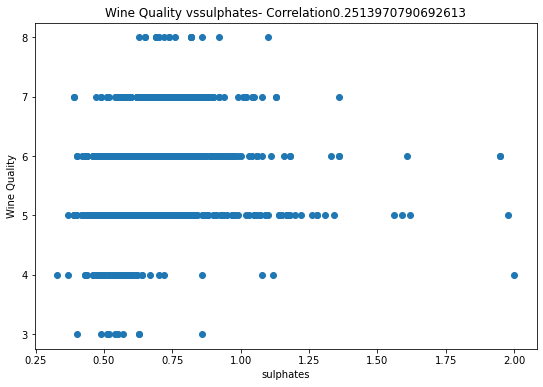

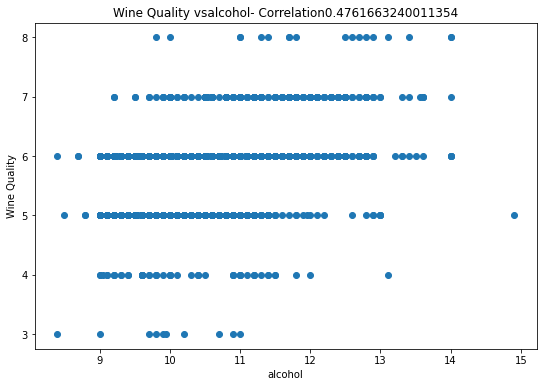

In [11]:
#Plotting scatter plots to identify the correlations
numeric_fetures = winedata[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']]
for col in numeric_fetures:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = winedata[col]
    label = winedata['quality']
    correlation = feature.corr(label)
    plt.scatter(x = feature, y = label)
    plt.xlabel(col)
    plt.ylabel('Wine Quality')
    #feature.hist(bins=100, ax=ax)
    #ax.axvline(feature.mean(), color = 'magenta', linestyle='dashed', linewidth = 2)
    #ax.axvline(feature.median(), color = 'green', linestyle='dashed', linewidth = 2)
    ax.set_title('Wine Quality vs'+ col + '- Correlation'+ str(correlation))
plt.show()

In [34]:
#Train the regression model
X,y = numeric_fetures.values,winedata['quality'].values
print('Features:',X[:10],'\nlabels:',y[:10],sep='\n')

Features:
[[  7.4      0.7      0.       1.9      0.076   11.      34.       0.9978
    3.51     0.56     9.4   ]
 [  7.8      0.88     0.       2.6      0.098   25.      67.       0.9968
    3.2      0.68     9.8   ]
 [  7.8      0.76     0.04     2.3      0.092   15.      54.       0.997
    3.26     0.65     9.8   ]
 [ 11.2      0.28     0.56     1.9      0.075   17.      60.       0.998
    3.16     0.58     9.8   ]
 [  7.4      0.7      0.       1.9      0.076   11.      34.       0.9978
    3.51     0.56     9.4   ]
 [  7.4      0.66     0.       1.8      0.075   13.      40.       0.9978
    3.51     0.56     9.4   ]
 [  7.9      0.6      0.06     1.6      0.069   15.      59.       0.9964
    3.3      0.46     9.4   ]
 [  7.3      0.65     0.       1.2      0.065   15.      21.       0.9946
    3.39     0.47    10.    ]
 [  7.8      0.58     0.02     2.       0.073    9.      18.       0.9968
    3.36     0.57     9.5   ]
 [  7.5      0.5      0.36     6.1      0.071   17.     

In [13]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape) 

(1119, 11) (480, 11) (1119,) (480,)


In [14]:
#training the model
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train,y_train)
print (model)

LinearRegression()


In [19]:
#Evaluating the trained model
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ',np.round(predictions)[:10])
print('Actual labels: ',y_test[:10])

Predicted labels:  [6. 5. 7. 5. 6. 5. 5. 6. 5. 5.]
Actual labels:  [6 5 7 6 5 6 5 6 4 5]


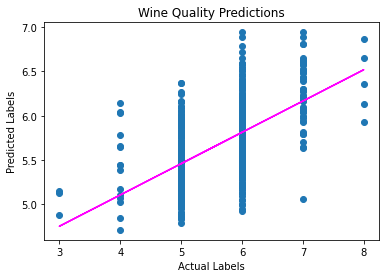

In [20]:
#Evaluation plots for prediction
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Wine Quality Predictions')
z = np.polyfit(y_test,predictions,1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),color='magenta')
plt.show()

In [21]:
#Calculating Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 0.40078036637500936
RMSE: 0.6330721652189498
R2: 0.3207112434321875


In [46]:
#Improving accuracy using train test proportion changing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def Change_Train_Test_Evaluate(TestSize):
    print("\nResults for Train:Test = "+ str(TestSize))
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = TestSize, random_state = 0)
    print(X_train.shape,X_test.shape,y_train.shape,y_test.shape) 
    model = LinearRegression().fit(X_train,y_train)
    print (model)
    predictions = model.predict(X_test)
    np.set_printoptions(suppress=True)
    print('Predicted labels: ',np.round(predictions)[:10])
    print('Actual labels: ',y_test[:10])
    mse = mean_squared_error(y_test, predictions)
    print("MSE:", mse)
    rmse = np.sqrt(mse)
    print("RMSE:", rmse)
    r2 = r2_score(y_test, predictions)
    print("R2:", r2)



In [47]:
Change_Train_Test_Evaluate(0.3)


Results for Train:Test = 0.3
(1119, 11) (480, 11) (1119,) (480,)
LinearRegression()
Predicted labels:  [6. 5. 7. 5. 6. 5. 5. 6. 5. 5.]
Actual labels:  [6 5 7 6 5 6 5 6 4 5]
MSE: 0.40078036637500936
RMSE: 0.6330721652189498
R2: 0.3207112434321875


In [57]:
for i in range(1,9):
    Change_Train_Test_Evaluate(i*0.1)
    


Results for Train:Test = 0.1
(1439, 11) (160, 11) (1439,) (160,)
LinearRegression()
Predicted labels:  [6. 5. 7. 5. 6. 5. 5. 6. 5. 5.]
Actual labels:  [6 5 7 6 5 6 5 6 4 5]
MSE: 0.389447062352836
RMSE: 0.6240569383901088
R2: 0.34918435953831195

Results for Train:Test = 0.2
(1279, 11) (320, 11) (1279,) (320,)
LinearRegression()
Predicted labels:  [6. 5. 7. 5. 6. 5. 5. 6. 5. 5.]
Actual labels:  [6 5 7 6 5 6 5 6 4 5]
MSE: 0.38447119782012307
RMSE: 0.6200574149384257
R2: 0.3283887639580245

Results for Train:Test = 0.30000000000000004
(1119, 11) (480, 11) (1119,) (480,)
LinearRegression()
Predicted labels:  [6. 5. 7. 5. 6. 5. 5. 6. 5. 5.]
Actual labels:  [6 5 7 6 5 6 5 6 4 5]
MSE: 0.40078036637500936
RMSE: 0.6330721652189498
R2: 0.3207112434321875

Results for Train:Test = 0.4
(959, 11) (640, 11) (959,) (640,)
LinearRegression()
Predicted labels:  [6. 5. 7. 5. 6. 5. 5. 6. 5. 5.]
Actual labels:  [6 5 7 6 5 6 5 6 4 5]
MSE: 0.4282404442865412
RMSE: 0.6544008284580187
R2: 0.28116187127935877